In [1]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: IRCarDataset/Nissan/Nissan_001.jpg  
  inflating: IRCarDataset/Nissan/Nissan_002.jpg  
  inflating: IRCarDataset/Nissan/Nissan_003.jpg  
  inflating: IRCarDataset/Nissan/Nissan_004.jpg  
  inflating: IRCarDataset/Nissan/Nissan_005.jpg  
  inflating: IRCarDataset/Nissan/Nissan_006.jpg  
  inflating: IRCarDataset/Nissan/Nissan_007.jpg  
  inflating: IRCarDataset/Nissan/Nissan_008.jpg  
  inflating: IRCarDataset/Nissan/Nissan_009.jpg  
  inflating: IRCarDataset/Nissan/Nissan_010.jpg  
  inflating: IRCarDataset/Nissan/Nissan_011.jpg  
  inflating: IRCarDataset/Nissan/Nissan_012.jpg  
  inflating: IRCarDataset/Nissan/Nissan_013.jpg  
  inflating: IRCarDataset/Nissan/Nissan_014.jpg  
  inflating: IRCarDataset/Nissan/Nissan_015.jpg  
  inflating: IRCarDataset/Nissan/Nissan_016.jpg  
  inflating: IRCarDataset/Nissan/Nissan_017.jpg  
  inflating: IRCarDataset/Nissan/Nissan_018.jpg  
  inflating: IRCarDataset/Nissan/Nissan_019.jpg  
  inflating: IRCarD

In [2]:
import os
from glob import glob
import shutil
from sklearn.model_selection import train_test_split

This script will create a list called nissan that contains the paths to all .jpg files in the /content/IRCarDataset/Nissan/ directory

In [3]:
nissan=glob("/content/IRCarDataset/Nissan/*.jpg")

In [4]:
nissan

['/content/IRCarDataset/Nissan/Nissan_968.jpg',
 '/content/IRCarDataset/Nissan/Nissan_056.jpg',
 '/content/IRCarDataset/Nissan/Nissan_722.jpg',
 '/content/IRCarDataset/Nissan/Nissan_059.jpg',
 '/content/IRCarDataset/Nissan/Nissan_547.jpg',
 '/content/IRCarDataset/Nissan/Nissan_647.jpg',
 '/content/IRCarDataset/Nissan/Nissan_1019.jpg',
 '/content/IRCarDataset/Nissan/Nissan_093.jpg',
 '/content/IRCarDataset/Nissan/Nissan_215.jpg',
 '/content/IRCarDataset/Nissan/Nissan_220.jpg',
 '/content/IRCarDataset/Nissan/Nissan_065.jpg',
 '/content/IRCarDataset/Nissan/Nissan_645.jpg',
 '/content/IRCarDataset/Nissan/Nissan_672.jpg',
 '/content/IRCarDataset/Nissan/Nissan_539.jpg',
 '/content/IRCarDataset/Nissan/Nissan_806.jpg',
 '/content/IRCarDataset/Nissan/Nissan_931.jpg',
 '/content/IRCarDataset/Nissan/Nissan_848.jpg',
 '/content/IRCarDataset/Nissan/Nissan_302.jpg',
 '/content/IRCarDataset/Nissan/Nissan_394.jpg',
 '/content/IRCarDataset/Nissan/Nissan_1111.jpg',
 '/content/IRCarDataset/Nissan/Nissan_

In [5]:
print(len(nissan))

1143


In [6]:
paykanvanat=glob("/content/IRCarDataset/PeykanVanat/*.jpg")
print(f"Nissan images:{len(nissan)}")
print(f"vanet images:{len(paykanvanat)}")


Nissan images:1143
vanet images:1143


In [7]:
train_nissan,val_nissan= train_test_split(nissan, shuffle=True, test_size=0.1,random_state=50)  # nissan was just a list
train_paykan,val_paykan=train_test_split(paykanvanat,shuffle=True, test_size=0.1,random_state=50)

In [8]:
print(f"nissan train:{len(train_nissan)} and nissan validation:{len(val_nissan)}")
print(f"paykan train:{len(train_paykan)} and paykan validation:{len(val_paykan)}")

nissan train:1028 and nissan validation:115
paykan train:1028 and paykan validation:115


 If exist_ok is set to True, the function will not raise an error if the directory already exists. Instead, it will leave the existing directory unaltered

In [9]:
# train folder creation
os.makedirs("/content/Data/train/",exist_ok=True)
os.makedirs("/content/Data/train/nissan/",exist_ok=True)
os.makedirs("/content/Data/train/paykan/",exist_ok=True)
os.makedirs("/content/Data/val/",exist_ok=True)
os.makedirs("/content/Data/val/nissan/",exist_ok=True)
os.makedirs("/content/Data/val/paykan/",exist_ok=True)

The shutil.move function in Python is used to move a file or directory from one location to another

In [10]:
# prompt: move all images represented by train_nissan to Data/ train/nissan

for image_path in train_nissan:
  shutil.move(image_path, "/content/Data/train/nissan/")


In [11]:
for image_path in train_paykan:
  shutil.move(image_path, "/content/Data/train/paykan/")

for image_path in val_nissan:
  shutil.move(image_path, "/content/Data/val/nissan/")

for image_path in val_paykan:
  shutil.move(image_path, "/content/Data/val/paykan/")

In [12]:
print(f"nissan train:{len(glob('/content/Data/train/nissan/*.jpg'))}")
print(f"paykan train:{len(glob('/content/Data/train/paykan/*.jpg'))}")
print(f"nissan val:{len(glob('/content/Data/val/nissan/*.jpg'))}")
print(f"paykan val:{len(glob('/content/Data/val/paykan/*.jpg'))}")

nissan train:1028
paykan train:1028
nissan val:115
paykan val:115


# Common Transforms
T.Compose: Combines multiple transforms into one.
T.Resize: Resizes the image to a specified size.
T.CenterCrop: Crops the image at the center to a specified size.
T.RandomCrop: Randomly crops the image to a specified size.
T.RandomHorizontalFlip: Randomly flips the image horizontally with a given probability.
T.RandomRotation: Rotates the image by a random angle.
T.ToTensor: Converts a PIL Image or numpy.ndarray to a tensor.
T.Normalize: Normalizes a tensor image with mean and standard deviation.
Example Usage
Here’s an example of how you might use some of these transforms in a pipeline:

Python

from torchvision import transforms as T

transform = T.Compose([
    T.Resize((256, 256)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [13]:
import os
import torch
import random
from glob import glob
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms as T #The torchvision.transforms module in PyTorch is used for transforming and augmenting images
from matplotlib import pyplot as plt
from PIL import Image


## Custom Dataset

**dataset_path=os.path.join(dataset_path , "**","*.jpg")
os.path.join(dataset_path, "**", "*.jpg"): This function constructs a path by joining the dataset_path with the pattern "**/*.jpg".
dataset_path: This is the base directory path.
"**": This is a wildcard that matches any number of directories and subdirectories.
"*.jpg": This matches all files with a .jpg extension.
The result is a path pattern that looks for all .jpg files in the dataset_path directory and all its subdirectories.
Line 2: self.images=glob(dataset_path, recursive=True)
glob(dataset_path, recursive=True): This function searches for files matching the pattern specified in dataset_path.
dataset_path: This is the pattern we constructed in the first line.
recursive=True: This allows the function to search through all subdirectories recursively.
self.images: This stores the list of all .jpg files found in the specified path and its subdirectories.
Summary
Together, these lines of code:

Create a search pattern to find all .jpg files within a given directory and its subdirectories.
Use this pattern to populate self.images with the paths of all matching files.**

In [14]:
class Ircardataset(Dataset):
  def __init__(self,dataset_path,transform) -> None: #The -> None part in the function definition is known as a type hint or type annotation. It indicates the return type of the function.
    super().__init__()                         # In this case, it specifies that the __init__ method does not return any value (i.e., it returns None).
    dataset_path=os.path.join(dataset_path , "**","*.jpg")  #"/content/Data/train"-->"/content/Data/train/**/*.jpg"
    self.images=glob(dataset_path, recursive=True)  #self.images-->paths
    self.transform=transform
    random.shuffle(self.images) #this is first time iamges are shuffled
    print(f"iamges count:{len(self.images)}")

    # lables:
    # nissan -- 0,  paykanvanet -- 1
    self.class_to_index={
        "nissan":0,
        "paykan":1
    }

  def __getitem__(self, index): #When you define __getitem__ in a class, you enable objects of that class to be indexed like lists, tuples, or dictionaries
    image_path=self.images[index]
    # print(image_path)
    class_name=image_path.split('/')[-2]
    label=self.class_to_index[class_name]
    # print(class_name, label)
    image=Image.open(image_path).convert("RGB")
    # showing image without augmentation
    # plt.subplot(1,2,1)
    # plt.imshow(image, cmap='gray')
    # showing image with augmentation
    if self.transform:
      image=self.transform(image) #totensor and t.normalize are temporarily disabled to let the image to be shown
    # plt.subplot(1,2,2)
    # plt.imshow(image)
    # plt.show()
    # return(index)
    z=torch.zeros(2)
    z[label]=1
    # print(f"z:{z}")
    return image, label,z

  def __len__(self):
    return(len(self.images))



it says that "All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] (which is done using ToTensor) and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]"(which is done using T.normalize)

In [15]:
train_transform=T.Compose([
  T.Resize((224,224)),
  T.ColorJitter(brightness=0.5,hue=0.3),
  # brightness=0.5: This parameter controls how much to jitter the brightness of the image. The brightness factor is chosen uniformly from the range ([1 - 0.5, 1 + 0.5]), which means the brightness can be adjusted to anywhere between 50% darker and 50% brighter than the original image.
  # hue=0.3: This parameter controls how much to jitter the hue of the image. The hue factor is chosen uniformly from the range ([-0.3, 0.3]), which means the hue can be adjusted within this range. The hue adjustment is done in the HSV color space, where hue represents the color type
  T.ToTensor(), #Conversion: It converts the input image (which can be in PIL Image format or a NumPy array) into a PyTorch tensor.
                #Scaling: It scales the pixel values of the image from the range [0, 255] to the range [0.0, 1.0]. This is useful because neural networks typically perform better when the input data is normalized.
  T.Normalize(mean=[0.485, 0.456, 0.406] , std = [0.229, 0.224, 0.225])  # imagenet mean and std for using pretrained models

])

# **train_loader=DataLoader(dataset=train_dataset, shuffle=True, batch_size=1)**
DataLoader: This is a PyTorch class used to load data in batches, which is essential for training machine learning models efficiently.
dataset=train_dataset: This specifies the dataset to be loaded. In this case, train_dataset is the dataset object containing your training data.
shuffle=True: This means that the data will be shuffled at the beginning of each epoch. Shuffling helps to ensure that the model does not learn any spurious patterns from the order of the data1.
batch_size=1: This sets the number of samples per batch to 1. Each time you iterate over train_loader, you will get one sample at a time2.
Summary
This line of code creates a DataLoader object named train_loader that:

Loads data from the train_dataset.
Shuffles the data at the start of each epoch.
Provides the data in batches of size 1.

In [16]:
train_dataset=Ircardataset(dataset_path="/content/Data/train", transform=train_transform)
train_loader=DataLoader(dataset=train_dataset, shuffle=True, batch_size=32)  #this is the second time which images are shuffled
next(iter(train_loader))

iamges count:2056


[tensor([[[[ 2.2489,  0.9132, -0.3541,  ..., -1.9980, -2.0323, -2.0323],
           [ 1.4783,  0.3652, -0.3027,  ..., -1.6213, -1.7240, -1.7925],
           [ 1.4783,  0.5536,  0.0056,  ..., -1.2274, -1.4672, -1.6384],
           ...,
           [-0.8164, -0.8507, -0.8678,  ..., -0.5082,  0.1083,  0.5022],
           [-0.8507, -0.8678, -0.9020,  ..., -1.3644, -1.1589, -0.9705],
           [-0.9020, -0.9192, -0.9534,  ..., -1.0219, -1.0562, -1.1075]],
 
          [[ 2.4286,  1.5182,  0.2927,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.1660,  1.0455,  0.3627,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.3060,  1.4307,  0.9580,  ...,  2.4286,  2.4286,  2.4286],
           ...,
           [ 0.8004,  0.7829,  0.7479,  ..., -0.0574,  0.4503,  0.8354],
           [ 0.7829,  0.7479,  0.7304,  ..., -0.7402, -0.6877, -0.4951],
           [ 0.7304,  0.6954,  0.6779,  ..., -0.3200, -0.4426, -0.5301]],
 
          [[ 2.6400,  1.2108, -0.0092,  ...,  1.8383,  1.8034,  1.8034],
           [ 

In [17]:
val_transform=T.Compose([
  T.Resize((224,224)),
  T.ToTensor(), #colorjitter was removed here
  T.Normalize(mean=[0.485, 0.456, 0.406] , std = [0.229, 0.224, 0.225])  # imagenet mean and std for using pretrained models

])
val_dataset=Ircardataset(dataset_path="/content/Data/val", transform=val_transform)
val_loader=DataLoader(dataset=val_dataset, shuffle=True, batch_size=1)  #this is the second time which images are shuffled

iamges count:230


In [18]:
for batch in val_loader:
  print(batch[0].shape,batch[1], batch[2])
  # print(batch)

torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([0]) tensor([[1., 0.]])
torch.Size([1, 3, 224, 224]) tensor([0]) tensor([[1., 0.]])
torch.Size([1, 3, 224, 224]) tensor([0]) tensor([[1., 0.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([0]) tensor([[1., 0.]])
torch.Size([1, 3, 224, 224]) tensor([0]) tensor([[1., 0.]])
torch.Size([1, 3, 224, 224]) tensor([0]) tensor([[1., 0.]])
torch.Size([1, 3, 224, 224]) tensor([1]) tensor([[0., 1.]])
torch.Size([1, 3, 224, 224]) tensor([1])

In [19]:
train_dataset=Ircardataset(dataset_path="/content/Data/train", transform=train_transform)
train_loader=DataLoader(dataset=train_dataset, shuffle=True, batch_size=32)  #this is the second time which images are shuffled
next(iter(train_loader))

iamges count:2056


[tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           ...,
           [-0.4054, -0.4226, -0.5082,  ..., -0.1999, -0.1143, -0.3369],
           [-0.4054, -0.4397, -0.5253,  ..., -0.1657, -0.0116, -0.2513],
           [-0.4054, -0.5082, -0.6109,  ..., -0.2513, -0.0287, -0.2513]],
 
          [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           ...,
           [-0.6527, -0.6702, -0.7227,  ..., -0.5651, -0.5301, -0.7577],
           [-0.6176, -0.6877, -0.7752,  ..., -0.4951, -0.3901, -0.6527],
           [-0.6527, -0.7227, -0.8277,  ..., -0.5826, -0.4251, -0.6527]],
 
          [[ 2.6400,  2.6400,  2.6400,  ...,  2.6400,  2.6400,  2.6400],
           [ 

In [20]:
val_transform=T.Compose([
  T.Resize((224,224)),
  T.ToTensor(), #colorjitter was removed here
  T.Normalize(mean=[0.485, 0.456, 0.406] , std = [0.229, 0.224, 0.225])  # imagenet mean and std for using pretrained models

])
val_dataset=Ircardataset(dataset_path="/content/Data/val", transform=val_transform)
val_loader=DataLoader(dataset=val_dataset, shuffle=True, batch_size=32)  #this is the second time which images are shuffled
for batch in val_loader:
  print(batch[0].shape,batch[1], batch[2])

iamges count:230
torch.Size([32, 3, 224, 224]) tensor([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1]) tensor([[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])
torch.Size([32, 3, 224, 224]) tensor([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0]) tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0.,

# AverageMeter

In [21]:
class AverageMeter(object):
  def __init__(self):
    self.reset()
  def reset(self):
    self.val=0
    self.sum=0
    self.count=0
    self.avg=0
  def update(self,val,n=1):
    self.val=val
    self.sum+=val*n
    self.count+=n
    self.avg=self.sum/self.count

avgM=AverageMeter()
avgM.update(val=1.1 , n=2)
avgM.update(val=0.9 , n=2)
print(avgM.avg)


1.0


In [22]:
!pip install transformers

In [23]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 10.6 MB/s eta 0:00:00


# training class

In [24]:
from transformers import SwinForImageClassification
from torch import optim
from torch import nn
from torchmetrics.classification import BinaryAccuracy
from tqdm import tqdm
import torch

class Training:

  def __init__(self , epochs:int) -> None:
    self.epochs=epochs
    self.device=torch.device("cuda" if torch.cuda.is_available() else "cpu")  #if gpu is available gpu if not cpu
    self.model=self.load_model().to(self.device)

    '''
    self.load_model():
    This calls the load_model method of the Training class. In your code, this method loads a pre-trained model from Hugging Face’s model
    hub using the SwinForImageClassification class. The model is configured with num_labels=2 and ignore_mismatched_sizes=True.
    .to(self.device):
    This method transfers the loaded model to the specified device. The self.device variable is set to either "cuda" (if a GPU is available)
     or "cpu" (if a GPU is not available). This ensures that the model is moved to the appropriate hardware for computation.
    self.model =:
    This assigns the model (after being loaded and transferred to the appropriate device) to the self.model attribute of the Training class.
    '''
    self.optimizer=optim.Adam(params=self.model.parameters(),lr=0.0001)
    '''
    params=self.model.parameters()
    This specifies the parameters of the model that the optimizer will update. self.model.parameters() returns an iterator over
    all the parameters of the model, which the optimizer will use to adjust the weights during training
    '''
    self.scheduler=optim.lr_scheduler.CosineAnnealingLR(optimizer=self.optimizer, T_max=5000 ,eta_min=1e-6)
    '''
    self.scheduler =:
    This assigns a learning rate scheduler to the self.scheduler attribute of the Training class. A learning rate scheduler adjusts the
    learning rate during training according to a predefined schedule.
    optim.lr_scheduler.CosineAnnealingLR(:
    This initializes the CosineAnnealingLR learning rate scheduler from the torch.optim.lr_scheduler module. This scheduler adjusts the
    learning rate following a cosine annealing schedule, which gradually decreases the learning rate following the cosine function.
    optimizer=self.optimizer,:
    This specifies the optimizer whose learning rate will be adjusted. Here, self.optimizer is the optimizer instance (e.g., Adam)
    that was previously defined.
    T_max=5000,:
    This sets the maximum number of iterations (or epochs) for one cycle of the cosine annealing schedule. In this case, the
    learning rate will follow a cosine curve over 5000 iterations before reaching the minimum learning rate.
    eta_min=1e-6:
    This sets the minimum learning rate value. The learning rate will decrease to this value at the end of the cosine annealing cycle.
    In summary, this line of code sets up a learning rate scheduler that will adjust the learning rate of the optimizer following a
    cosine annealing schedule, gradually decreasing it over 5000 iterations to a minimum value of (1 \times 10^{-6}) 12.
    '''
    self.loss_fn= nn.CrossEntropyLoss()
    '''
    Yes, the parentheses () are needed in self.loss_fn = nn.CrossEntropyLoss(). Here’s why:
    nn.CrossEntropyLoss is a class in PyTorch that defines the cross-entropy loss function.
    nn.CrossEntropyLoss() creates an instance of this class. The parentheses are used to call the constructor of the class, which initializes the loss function object.
    Without the parentheses, you would be assigning the class itself to self.loss_fn, not an instance of the class. This means you wouldn’t be able to use it to compute the loss during training
    '''
    self.metric= BinaryAccuracy().to(self.device)
    '''
    What is BinaryAccuracy?
    BinaryAccuracy is a metric used to evaluate the performance of a binary classification model. It calculates the accuracy of the
    model by comparing the predicted labels to the true labels. The accuracy is the ratio of correctly predicted labels to the total
    number of labels.

    Explanation of the Code
    self.metric =:
    This assigns the BinaryAccuracy metric to the self.metric attribute of the Training class.
    BinaryAccuracy():
    This initializes an instance of the BinaryAccuracy class. By default, it uses a threshold of 0.5 to convert predicted
    probabilities into binary labels (0 or 1). If the predicted probability is greater than or equal to 0.5, it is
    considered as class 1; otherwise, it is class 01.
    .to(self.device):
    This method moves the BinaryAccuracy metric to the specified device (either GPU or CPU). The self.device variable is set to
    either "cuda" (if a GPU is available) or "cpu" (if a GPU is not available). This ensures that the metric computations are
    performed on the same device as the model1.
    Summary
    In summary, the line self.metric = BinaryAccuracy().to(self.device) initializes the BinaryAccuracy metric and moves it
    to the appropriate device (GPU or CPU) for computation. This metric will be used to evaluate the accuracy of your
    binary classification model during training and validation
    '''

  def save_model(self,epoch):
    os.makedirs(f"./checkpoint",exist_ok=True)
    torch.save(self.model.state_dict(),f"./checkpoint/ckpnt-{epoch}.pth")

  def load_model(self,weight_path=None):
    model=SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224", #go to hugging face,models,
                                                      #image classification,search swin,select tiny
                                                      num_labels=2,
                                                      ignore_mismatched_sizes=True
                                                      )
    '''
    model = SwinForImageClassification.from_pretrained(:
    This line initializes a model for image classification using the Swin Transformer architecture.
    The from_pretrained method loads a pre-trained model from Hugging Face’s model hub.
    "microsoft/swin-tiny-patch4-window7-224",:
    This specifies the exact pre-trained model to load. In this case, it’s the “swin-tiny-patch4-window7-224” model provided by Microsoft.
    This model is trained on the ImageNet-1k dataset and uses a tiny version of the Swin Transformer architecture12.
    num_labels=2,:
    This sets the number of output labels for the classification task. Here, it is set to 2, indicating that the model will classify images
     into one of two categories.
    ignore_mismatched_sizes=True:
    This parameter allows the model to load even if the size of the pre-trained weights does not exactly match the size of the model
    architecture. This can be useful if you are fine-tuning the model on a different dataset or with a different number of labels than
    it was originally trained on2.
    In summary, this block of code loads a pre-trained Swin Transformer model for image classification, configures it for a binary
    classification task, and ensures compatibility even if there are size mismatches in the model weights.
    '''
    if weight_path is not None:
      model.load_state_dict(torch.load(weight_path,map_location=self.device))
      '''
      Load the model weights:
      torch.load(weight_path): This function loads the saved model weights from the file specified by weight_path. The torch.load
      function deserializes the saved object, which is typically a dictionary containing the model’s state (weights and biases)
      Map the loaded weights to the correct device:
      map_location=self.device: This argument ensures that the loaded weights are mapped to the device specified by self.device.
      This is useful when loading a model trained on a different device (e.g., loading a model trained on a GPU to a CPU) 2.
      Update the model’s state:
      model.load_state_dict(...): This method loads the state dictionary into the model. The state dictionary contains the
      model’s parameters (weights and biases) 2.
      In summary, this code checks if a path to the model weights is provided. If so, it loads the weights from the specified file
      and maps them to the appropriate device before updating the model’s parameters
      '''
    return model

  def train(self,train_loader):
    # loss_train=0.1
    # acc_train=99
    # return loss_train,acc_train
    self.model.train()
    '''
    The line self.model.train() in your train function sets the model to training mode. This does not initiate training or
    perform any training steps directly but instead configures certain layers of the model to behave differently during
    training as opposed to evaluation or inference.

    Here's what happens when you call self.model.train():

    Batch Normalization and Dropout Layers: If your model includes layers like Batch Normalization or Dropout, these
    layers behave differently during training and evaluation:

    Batch Normalization: During training, it uses the statistics (mean and variance) of the current batch. During evaluation,
    it uses the running statistics computed during training.
    Dropout: During training, it randomly zeroes out some of the activations to prevent overfitting. During evaluation, Dropout
    is turned off, and the full activations are used.
    Training Mode vs. Evaluation Mode:

    In training mode (enabled by self.model.train()), layers like Batch Normalization and Dropout behave in a way that is
    specific to training.
    In evaluation mode (enabled by self.model.eval()), these layers behave in a way that is specific to inference/evaluation,
    where they use running statistics (Batch Normalization) and do not drop activations (Dropout).
    So, calling self.model.train() does not start the training process itself; rather, it ensures that the model is set up
    correctly for training by switching the model to the correct mode. The actual training loop (forward pass, loss computation,
    backpropagation, and optimizer steps) will need to be implemented in the rest of your train method.
    '''
    loss_train=AverageMeter()
    self.metric.reset()
    '''
    In your `Training` class, the line `self.metric.reset()` is used to reset the state of the metric calculation, which in your case is `BinaryAccuracy`.

    ### Explanation of `self.metric.reset()`:

    - **Purpose**: The `reset()` method is typically used to clear the internal state of a metric object so that it can start
    fresh for a new batch or epoch. This is important because metrics like accuracy often accumulate results across multiple batches,
    and if not reset, they would incorrectly aggregate values from previous epochs.

    - **In Context**:
      - `self.metric` is an instance of `BinaryAccuracy` (from PyTorch Lightning or TorchMetrics, depending on your imports).
      - `BinaryAccuracy` tracks the accuracy of predictions for binary classification problems.
      - Before starting the training loop over the batches in each epoch, calling `reset()` ensures that the accuracy is
      calculated correctly for the current epoch only, without interference from previous results.

    ### Why Reset the Metric?

    - **Prevent Incorrect Aggregation**: If you don’t reset the metric at the start of an epoch, the accuracy calculation might
    include data from previous epochs, which would skew your results.
    - **Accurate Epoch Metrics**: Resetting ensures that each epoch’s accuracy (or other metric) is computed independently.

    In the broader training workflow, resetting metrics at the start of each epoch is a standard practice to ensure the validity
    of the reported statistics for each training epoch.
    '''
    for index,(inputs, labels, z) in enumerate(train_loader):
      inputs = inputs.to(self.device)
      labels = labels.to(self.device)
      z      = z.to(self.device)
      '''
      Explanation of the Loop
      Iteration Over train_loader:

      train_loader is a PyTorch DataLoader that provides batches of data for training.
      Each iteration of the loop retrieves a batch consisting of inputs, labels, and z.
      In the context of image classification, inputs typically contain image data, and labels contain the corresponding ground truth
      labels. z is an additional input which could represent any other associated data, such as metadata, additional features, or
       auxiliary targets.
      Moving Data to the Appropriate Device:

      inputs = inputs.to(self.device) moves the input tensors to the device specified by self.device.
      self.device is defined as either a GPU (cuda) or a CPU (cpu), depending on the availability of a GPU (torch.device("cuda" if
      torch.cuda.is_available() else "cpu")).
      This operation ensures that the tensors are on the correct device, allowing computations to be performed on the GPU if
      available, which is typically much faster than the CPU for deep learning tasks.
      Detailed Steps of the Loop:
      inputs, labels, z in train_loader:

      Retrieves a batch of data where:
      inputs are the input images (or other data types) in the batch.
      labels are the corresponding labels for those inputs.
      z represents additional data that you might be using in your model (e.g., auxiliary data, additional features).
      .to(self.device):

      Converts the tensor data to the device specified (self.device).
      This is essential for compatibility with the model and ensuring the computations are performed on the desired hardware (CPU/GPU).
      Why This is Important:
      Device Consistency: Ensures that both the data and the model are on the same device, preventing runtime errors due to device mismatches.
      Performance Optimization: Utilizing a GPU (cuda) when available accelerates training by leveraging parallel computations, which is especially beneficial for large datasets and complex models.
      This loop is a crucial part of the training process, handling the data flow from the DataLoader to the model, ensuring that everything runs smoothly on the appropriate hardware.
      '''

      self.optimizer.zero_grad()
      '''
      The line `self.optimizer.zero_grad()` in the training loop plays a crucial role in managing the gradients during the
      training of a neural network. Here's a detailed explanation of its purpose:

      ### Explanation of `self.optimizer.zero_grad()`

      - **Purpose**: This line clears (resets) the gradients of all model parameters before the backward pass (gradient computation)
       in each training step.

      ### Why `zero_grad()` is Necessary

      1. **Accumulation of Gradients**:
        - During backpropagation, gradients of the loss with respect to model parameters are calculated and accumulated.
        - In PyTorch, gradients are accumulated by default. This means that after each `loss.backward()` call, the computed
        gradients are added to the existing gradients stored in the parameters' `.grad` attribute.

      2. **Preventing Gradient Buildup**:
        - If you don't clear the gradients using `zero_grad()`, the gradients would keep accumulating across multiple batches.
        - This would result in incorrect and unintended gradient values, leading to incorrect parameter updates and, consequently,
        poor model training.

      3. **Correct Gradient Updates**:
        - By calling `self.optimizer.zero_grad()` at the start of each training iteration, you ensure that gradients are correctly
         computed for the current batch only.
        - This allows `loss.backward()` to accurately compute the gradients based on the current batch's loss, ensuring correct and
        independent updates for each batch.

      ### Workflow in a Training Step

      Here's the typical sequence of steps in a training iteration within the loop:

      1. **Zero the Gradients**: `self.optimizer.zero_grad()` clears old gradients.
      2. **Forward Pass**: Compute the model's predictions on the current batch of inputs.
      3. **Compute Loss**: Calculate the loss between the model's predictions and the true labels.
      4. **Backward Pass**: `loss.backward()` computes the gradients of the loss with respect to the model's parameters.
      5. **Update Parameters**: `self.optimizer.step()` updates the model's parameters using the computed gradients.

      By resetting the gradients at the start of each iteration, `self.optimizer.zero_grad()` ensures that each batch's gradient
       updates are independent and accurate, which is critical for effective learning of the model.
      '''
      outputs=self.model(inputs)
      '''
      In the line `outputs = self.model(inputs)`, let's break down what’s happening:

      ### 1. Understanding `self.model`

      - **Model as a Class Instance**:
        - `self.model` is an instance of a neural network class (in your case, `SwinForImageClassification`).
        - In PyTorch, neural network models are typically defined as subclasses of `torch.nn.Module`, which means they are indeed classes.
        - When you instantiate `self.model = self.load_model().to(self.device)`, you're creating an object of that model class.

      ### 2. `inputs` as a Batch

      - **Batch of Inputs**:
        - `inputs` is a batch of data that comes from your DataLoader. Typically, in image classification tasks, `inputs` would
        be a tensor of shape `(batch_size, channels, height, width)`.
        - For example, if your batch size is 32, and you're working with RGB images of size 224x224, `inputs` might have a shape
        like `(32, 3, 224, 224)`.

      ### 3. How `inputs` is Used as an Argument

      - **Calling the Model Instance**:
        - In PyTorch, when you use the syntax `self.model(inputs)`, you're not passing `inputs` directly to a class but rather
        invoking the model's `forward()` method.
        - This behavior is due to the `__call__()` magic method in PyTorch's `nn.Module` class, which allows the model instance
        to be called like a function.

      ### How It Works:

      1. **Forward Pass**:
        - When `self.model(inputs)` is called, under the hood, it triggers the `forward()` method of the model class,
        passing `inputs` as its argument.

      2. **Processing the Batch**:
        - The `forward()` method defines how the input data flows through the network (e.g., through layers like convolutions,
        activation functions, fully connected layers, etc.).
        - The input tensor (`inputs`) is processed by the model, and the output (e.g., logits or predictions) is computed and returned.

      ### Summary:

      - **`self.model`**: An instance of a neural network class that inherits from `torch.nn.Module`.
      - **`inputs`**: A batch of data, typically a tensor of shape `(batch_size, channels, height, width)`.
      - **Model Invocation**: The line `self.model(inputs)` invokes the `forward()` method of the model, processing the input batch
       through the network and returning the outputs.

      This mechanism allows for a clean and intuitive way to pass data through models in PyTorch, leveraging Python's object-oriented
       capabilities to treat the model instance as if it were a function.
      '''
      loss=self.loss_fn(outputs.logits,labels)
      '''
      The line loss = self.loss_fn(outputs.logits, labels) calculates the loss value during training, which measures how well the
      model's predictions match the true labels. Let's break down each component of this line:

      Explanation of the Line
      Loss Calculation:

      self.loss_fn is your loss function, which is defined as nn.CrossEntropyLoss() in your Training class.
      The purpose of the loss function is to quantify the difference between the predicted outputs of the model and the actual
      target values (labels).
      In this case, CrossEntropyLoss is commonly used for classification tasks and combines LogSoftmax and Negative Log-Likelihood
      Loss in one single class.
      outputs.logits:

      outputs is the result of the forward pass through the model: outputs = self.model(inputs).
      In your code, outputs is expected to be an object from which you access the logits using outputs.logits.
      Logits are the raw, unnormalized predictions from the model, which are usually the output of the last linear layer before
      applying a softmax activation function. They represent the model's confidence in each class, but they are not probabilities
      (they haven't been normalized yet).
      labels:

      labels are the true labels (ground truth) of the input data in the batch.
      In the context of classification, labels is typically a tensor containing the indices of the correct classes for each sample
      in the batch.
      What is outputs.logits?
      Logits:

      Logits are the direct outputs from the model's final layer before any activation function like softmax is applied.
      They are not constrained to a range (e.g., [0, 1] for probabilities), so they can be any real number.
      For a binary classification problem with two classes, logits might be a tensor of shape (batch_size, 2).
      Why Use Logits in Loss Calculation?:

      Loss functions like CrossEntropyLoss expect logits as inputs because they internally apply softmax to convert these
      logits into probabilities.
      By passing logits directly, you avoid numerical instability and redundancy that would come from manually applying
      softmax before the loss function.
      How CrossEntropyLoss Works with Logits
      CrossEntropyLoss applies a softmax function to the logits to obtain probabilities, and then calculates the negative log-likelihood
      of the predicted probability for the true class label.
      This loss penalizes incorrect predictions more heavily and provides a differentiable error signal that can be used to update the
      model weights during training.
      Summary
      loss = self.loss_fn(outputs.logits, labels) computes the loss using the raw model predictions (logits) and the true labels.
      outputs.logits are the raw, unnormalized outputs of the model that are used as inputs to the loss function.
      This setup allows the loss function to accurately measure the model's performance and provide the necessary feedback to improve
      the model during training through backpropagation.
      '''
      loss.backward()
      '''
      The line loss.backward() is an essential part of the training process in PyTorch, particularly in how the framework handles
      automatic differentiation.

      What It Does:
      Backpropagation of Gradients: loss.backward() computes the gradients of the loss function with respect to all the parameters
       (weights and biases) in the model that have requires_grad=True. This is a step of backpropagation, where gradients are
       propagated backward through the network.

      These gradients are later used by the optimizer (e.g., Adam, SGD) to update the model's parameters in order to minimize the loss.

      Breakdown of the Process:
      Forward Pass: When you compute the outputs of the model (e.g., outputs = self.model(inputs)), it performs a forward pass
      through the network. The model takes the input data, processes it layer by layer, and produces predictions (logits).

      Loss Calculation: After you have the model's predictions, you compute the loss using a loss function. In your case,
       you’re using nn.CrossEntropyLoss():

      python
      Copy code
      loss = self.loss_fn(outputs.logits, labels)
      The loss represents how far off the model's predictions are from the true labels. The lower the loss, the better the
      model's predictions are.

      Backpropagation (loss.backward()): After computing the loss, calling loss.backward() initiates backpropagation:

      It computes the gradient of the loss with respect to each parameter in the model.
      The gradients represent how much the loss would change if you slightly changed the parameters (weights and biases).
      These gradients are stored in the grad attribute of each parameter.
      Parameter Update: The gradients calculated during loss.backward() are used by the optimizer in the next step:

      python
      Copy code
      self.optimizer.step()
      This line uses the gradients to update the parameters (weights and biases) of the model, moving them in the direction
       that minimizes the loss. Essentially, the optimizer modifies the parameters based on the gradient values.

      Summary:
      loss.backward() calculates the gradients of the loss function with respect to each trainable parameter in the network,
      setting the stage for the optimizer to adjust the parameters and reduce the loss in the next step
      '''
      self.optimizer.step()
      '''
      The line self.optimizer.step() is used to update the model’s parameters based on the gradients that were calculated in the backpropagation step (loss.backward()).

      What It Does:
      Updates Model Parameters: self.optimizer.step() takes the gradients that were computed during loss.backward() and applies them to the model’s parameters (such as weights and biases) to minimize the loss. This is part of the optimization process.

      Each parameter is updated in such a way that it moves in the direction that reduces the loss. This is the core of what allows the model to "learn" during training.

      Breakdown of the Process:
      Before step() is Called:

      You have already computed the gradients for the loss with respect to the model’s parameters by calling loss.backward().
      These gradients are stored in the .grad attribute of each parameter (i.e., weights and biases).
      Calling optimizer.step():

      When you call self.optimizer.step(), the optimizer uses these stored gradients to adjust the parameters.
      Depending on the optimizer you are using (e.g., Adam, SGD, etc.), it applies a specific algorithm to update the parameters. For instance:
      SGD (Stochastic Gradient Descent): Updates the parameters by subtracting a scaled version of the gradient from the current parameters.
      Adam: Combines ideas from both momentum and adaptive learning rates, making it a more complex but effective optimizer.
      How Parameters Are Updated: In general, the parameters are updated as follows:

      𝜃new=𝜃old−𝜂⋅∇𝜃𝐿(𝜃)
      θnew=θold−η⋅∇θ​L(θ)
      : Updated parameters (weights/biases).
      𝜃old
      : Current parameters before the update.
      L(θ): The gradient of the loss function
      θ (computed by loss.backward()).
      In Practice: When you call self.optimizer.step(), it performs the above update for all the parameters of the model. This moves the parameters in a direction that reduces the loss function, thereby improving the model’s performance on the task.
      '''
      loss_train.update(loss.item(),n=len(labels))
      '''
      The line `loss_train.update(loss.item(), n=len(labels))`, while not in your main code, is a key part of tracking the running average of the loss during training. Let’s break it down precisely in its context, assuming it comes after `self.optimizer.step()` in your training loop.

      ### Components of the Line:

      1. **`loss.item()`**:
        - `loss` is a tensor containing the computed loss for the current batch, which is differentiable and used for backpropagation.
        - `.item()` converts this tensor to a Python float, which is non-differentiable and used for logging or tracking the numeric loss value.
        - **Purpose**: You extract the numeric loss value to update the running average tracker (`loss_train`).

      2. **`n=len(labels)`**:
        - `len(labels)` represents the batch size, i.e., how many samples were in the current batch.
        - **Purpose**: This tells the `AverageMeter` object how many samples contributed to this batch's loss. It allows the running average to be weighted appropriately based on the number of samples.

      3. **`loss_train.update()`**:
        - `loss_train` is an instance of the `AverageMeter` class (initialized earlier as `loss_train = AverageMeter()`).
        - `update(val, n=1)` is the method that:
          - Updates `val`, which stores the most recent loss value.
          - Updates `sum`, which adds the product of the loss value (`val`) and the batch size (`n`).
          - Updates `count`, which increments by the batch size (`n`).
          - Recalculates the running average (`avg = sum / count`).
        - **Purpose**: It updates the running sum and average of the loss across all the batches processed so far in the epoch.

      ### The Flow of This Line in the Training Loop:

      When this line is executed after `self.optimizer.step()`, it updates the average loss over all the batches processed in that epoch. Here’s how the process works step by step:

      1. **Before This Line:**
        - You've completed the forward pass (`outputs = self.model(inputs)`), computed the loss (`loss = self.loss_fn(outputs, labels)`), and performed backpropagation (`loss.backward()`).
        - You’ve updated the model’s parameters with `self.optimizer.step()`.

      2. **This Line:**
        - You now call `loss_train.update(loss.item(), n=len(labels))`.
        - **`loss.item()`** extracts the scalar value of the current batch's loss.
        - **`n=len(labels)`** passes the number of samples in the current batch (which is often 32, 64, or another batch size).
        - The `update()` method of `loss_train` then:
          - Sets the most recent loss (`val`) to the current batch’s loss.
          - Adds `loss.item() * len(labels)` to the cumulative sum of the losses (`sum`).
          - Increments the count (`count`) by `len(labels)` (total number of samples seen so far).
          - Recalculates the running average of the loss (`avg = sum / count`).

      ### Purpose of `loss_train.update()` in the Training Loop:

      - **Running Average of the Loss**: As your model processes each batch, the loss for each batch will fluctuate. Instead of looking at the loss of a single batch, it’s more meaningful to track the average loss over all the batches in the epoch. This gives you a smoother and more representative view of how well the model is learning over time.

      - **Weighting by Batch Size**: Since `n=len(labels)` ensures that larger batches contribute proportionally more to the overall loss, it correctly weights the loss based on how many samples were in each batch.

      ### Example of How It Fits in the Code:

      ```python
      def train(self, epoch, train_loader):
          # Initialize AverageMeter to track training loss
          loss_train = AverageMeter()

          # Set the model to training mode
          self.model.train()
          self.metric.reset()

          # Iterate over batches in the training data
          for inputs, labels, z in train_loader:
              inputs = inputs.to(self.device)
              labels = labels.to(self.device)

              # Zero the gradients from the previous step
              self.optimizer.zero_grad()

              # Forward pass: compute model output
              outputs = self.model(inputs)

              # Compute the loss
              loss = self.loss_fn(outputs.logits, labels)

              # Backpropagation: compute gradients
              loss.backward()

              # Update the model parameters
              self.optimizer.step()

              # Update running average of the training loss
              loss_train.update(loss.item(), n=len(labels))

          # Return the average loss for the epoch
          return loss_train.avg, self.metric.compute().item()
      ```

      ### How the Line Fits in:
      1. After each batch, `loss_train.update()` is called to update the running average of the loss.
      2. This allows you to track the overall average loss across the entire dataset for that epoch.
      3. At the end of the epoch, `loss_train.avg` gives the average loss for the epoch, which you can print or log to track the model’s performance.

      ### Summary:
      - **`loss_train.update(loss.item(), n=len(labels))`** updates the running average of the loss across batches in the training loop.
      - It tracks how well the model is learning by calculating the cumulative and average loss across all samples.
      - By updating the loss with `n=len(labels)`, you ensure the running average is correctly weighted based on batch size.
      '''
      self.metric.update(outputs.logits,z)
      '''
      The line `self.metric.update(outputs.logits, z)` is intended to update a performance metric (such as accuracy, precision, etc.) during training. Let’s break down the components of this line and explain what it does:

      ### Components of the Line:

      1. **`self.metric`**:
        - `self.metric` is likely an instance of a metric-tracking class. Based on the initialization in your code (`self.metric = BinaryAccuracy().to(self.device)`), this is a **binary accuracy metric**.
        - `BinaryAccuracy` computes the accuracy of a binary classification model, comparing the predicted outputs with the true labels.

      2. **`outputs.logits`**:
        - `outputs.logits` refers to the raw, unnormalized outputs of the model before applying a softmax or sigmoid function. These are the logits, which can then be processed to make predictions.
        - Logits are typically passed through an activation function (like `sigmoid` for binary classification or `softmax` for multi-class classification) to get probability scores, which are used to compute the predictions.
        - **Purpose**: The `logits` are the predicted values from the model for each sample in the batch, and they are used to determine the predicted class.

      3. **`z`**:
        - `z` is a tensor that represents the **true labels** in one-hot encoded format. In your dataset class, this was defined as a tensor with zeros except for the correct class index (where the value is 1).
        - For instance, if you have two classes (`nissan` and `paykan`), and the label for a sample is `nissan`, `z` would be `[1, 0]`.
        - **Purpose**: This tensor is used as the ground truth against which the model's predictions are compared.

      4. **`self.metric.update()`**:
        - The `update()` method of `self.metric` takes the model’s predictions (in the form of logits) and the true labels (`z`), and it calculates how well the model is performing based on the accuracy metric.
        - **Purpose**: `update()` is called after each batch to accumulate the performance metrics for the entire epoch. It continuously updates the accuracy by comparing the predicted classes with the true labels.

      ### What Happens in This Line:

      When `self.metric.update(outputs.logits, z)` is called:
      1. **Prediction Processing**:
        - The `outputs.logits` (logits) are passed into the metric to determine the predicted classes. For binary classification, this often involves applying a sigmoid function to convert logits into probabilities, then thresholding the probabilities (e.g., at 0.5) to get predicted classes (0 or 1).
        - The true labels (`z`) are provided, which represent the correct class for each sample.

      2. **Metric Calculation**:
        - `self.metric.update()` compares the predicted classes (derived from `outputs.logits`) with the true labels (`z`).
        - For binary accuracy, it checks whether the predicted class matches the true label for each sample in the batch.
        - It accumulates the correct predictions over all batches during the epoch to compute the running accuracy.

      3. **Metric Accumulation**:
        - This line allows the metric (in this case, accuracy) to be updated progressively with each batch of data. The accumulated values are stored in `self.metric`, so by the end of the epoch, the metric can be computed for the entire dataset.

      ### Example Workflow:

      Let’s assume the model outputs logits for a batch of 4 samples, and the true labels (`z`) for these samples are:

      ```python
      outputs.logits = tensor([[ 1.5], [-0.2], [ 0.7], [-1.1]])  # Logits predicted by the model
      z = tensor([1, 0, 1, 0])  # True binary labels
      ```

      - For a **binary classification task**:
        - The logits will be passed through a sigmoid function to get probabilities.
        - The resulting probabilities might look like this:
          ```python
          probabilities = sigmoid(outputs.logits) = tensor([0.8176, 0.4502, 0.6682, 0.2493])
          ```
        - These probabilities are thresholded at 0.5 to determine the predicted classes:
          ```python
          predicted_classes = [1, 0, 1, 0]
          ```
        - `self.metric.update(predicted_classes, z)` would compare these predicted classes with the true labels (`z = [1, 0, 1, 0]`), resulting in 100% accuracy for this batch.

      - **`update()` accumulates** the correct predictions over all the batches in the epoch to maintain the running accuracy.

      ### Full Training Loop Context:

      Here’s how `self.metric.update(outputs.logits, z)` would fit into the full training loop, assuming it comes after `loss_train.update(loss.item(), n=len(labels))`:

      ```python
      def train(self, epoch, train_loader):
          # Initialize the AverageMeter to track training loss
          loss_train = AverageMeter()

          # Reset the metric for the new epoch
          self.metric.reset()

          # Set the model to training mode
          self.model.train()

          # Iterate over the training data
          for inputs, labels, z in train_loader:
              inputs = inputs.to(self.device)
              labels = labels.to(self.device)
              z = z.to(self.device)  # Ensure z (true labels in one-hot) is on the right device

              # Zero out the gradients from the previous step
              self.optimizer.zero_grad()

              # Forward pass: compute model output
              outputs = self.model(inputs)

              # Compute the loss
              loss = self.loss_fn(outputs.logits, labels)

              # Backpropagation: compute gradients
              loss.backward()

              # Update the model parameters based on gradients
              self.optimizer.step()

              # Update the running average of the training loss
              loss_train.update(loss.item(), n=len(labels))

              # Update the metric (accuracy) with the predicted outputs and true labels
              self.metric.update(outputs.logits, z)

          # Return the average training loss and the computed metric (accuracy, etc.)
          return loss_train.avg, self.metric.compute().item()
      ```

      ### Summary:
      - **`self.metric.update(outputs.logits, z)`** updates a performance metric (e.g., binary accuracy) by comparing the predicted logits from the model with the true labels (`z`).
      - It allows for accumulating the metric (e.g., accuracy) across all batches in the epoch, progressively updating the running accuracy.
      - This line ensures that the metric is continuously computed and updated throughout the training process, allowing you to monitor how well the model is learning over time.
      '''
      print(f"{index} / {len(train_loader)}")



    self.scheduler.step()
    """
    Function of self.scheduler.step():
    Update Learning Rate:

    Purpose: self.scheduler.step() updates the learning rate based on the scheduling policy you’ve defined (e.g., Cosine Annealing,
     StepLR, etc.).
    Effect: This call adjusts the learning rate for the next epoch or training step according to the learning rate schedule. For instance:
    Cosine Annealing: The learning rate might decrease or follow a cosine curve as the training progresses.
    StepLR: The learning rate may be reduced by a fixed factor after a set number of epochs.
    Frequency:

    Epoch-Level Update: Placing self.scheduler.step() outside the for loop but inside the train() function means it will be called
     once per epoch, updating the learning rate based on the schedule after all batches in the current epoch have been processed.
    Impact on Training:
    Dynamic Learning Rate Adjustment: By updating the learning rate at the end of each epoch, you ensure that the learning rate is
    adapted progressively according to the schedule. This can help the model converge more effectively and potentially avoid overshooting minima in the loss landscape.

    Epoch-Based Scheduling: If the scheduler requires an update after each epoch (which is the case for many schedulers like StepLR),
    placing self.scheduler.step() here ensures that the learning rate is updated at the appropriate times.
    """
    return loss_train.avg,self.metric.compute().item()
    """
    The line return loss_train.avg, self.metric.compute().item() returns two values from the train function, summarizing the
    performance of the model for the current epoch. Here’s a detailed breakdown:

    1. loss_train.avg:
    loss_train is an instance of the AverageMeter class, which tracks and averages the loss during training.
    avg: The avg attribute represents the average loss across all batches in the current epoch.
    Purpose: This is used to monitor how well the model is learning based on the average loss over the epoch. A lower average loss
    typically indicates better performance.
    Summary: This returns the average training loss for the epoch.

    2. self.metric.compute().item():
    self.metric: This refers to the metric object, which in your case seems to be an accuracy metric like BinaryAccuracy. It
    tracks the model's performance in terms of accuracy across the epoch.
    compute(): The compute() method calculates the final value of the metric (e.g., accuracy) based on the predictions and labels
    collected during the epoch.
    .item(): This converts the returned tensor (which holds the computed metric) to a standard Python float value. The .item()
    method extracts the value from the single-element tensor.
    Summary: This returns the accuracy (or whatever metric is being tracked) for the epoch, as a float.
    """



  def run(self):
    print("start training...")
    best_val_loss=torch.inf
    for epoch in range(1,self.epochs+1):
      print(epoch)
      #train
      loss_train,acc_train=self.train(train_loader)
      print(f"loss train:{loss_train}, acc train:{acc_train}")
      #validation
      loss_val,acc_val=self.validation(val_loader)
      print(f"loss val:{loss_val}, acc val:{acc_val}")
      if loss_val<best_val_loss:
        best_val_loss=loss_val
        self.save_model(epoch=epoch)
    print(best_val_loss)

  def validation(self,val_loader):
    # loss_val=0.1
    # acc_val=99
    # return loss_val,acc_val
    # pass
    self.model.eval()
    '''
    The line `self.model.eval()` sets the model to evaluation mode in PyTorch. This changes the behavior of certain layers,
    like dropout and batch normalization, which function differently during training and inference.

    - **Dropout**: During training, dropout randomly zeroes some activations to prevent overfitting, but during evaluation,
      it is turned off (i.e., all neurons are used).
    - **Batch Normalization**: In training mode, it normalizes activations based on the batch statistics. In evaluation mode,
      it uses the accumulated running statistics instead.

    By calling `self.model.eval()`, you ensure that the model behaves correctly for inference or validation, using its
      learned parameters without the randomness introduced during training.
    '''
    loss_val=AverageMeter()
    self.metric.reset()
    for index,(inputs,labels,z) in enumerate(val_loader):
      inputs=inputs.to(self.device)
      labels=labels.to(self.device)
      z=z.to(self.device)
      with torch.inference_mode():
        outputs=self.model(inputs)
        '''
        This snippet:

        ```python
        with torch.inference_mode():
            outputs = self.model(inputs)
        ```

        is used to compute outputs in evaluation mode. Here’s a precise breakdown:

        1. **`with torch.inference_mode()`**:
          - This is a context manager in PyTorch that disables gradient calculation.
          - It’s specifically designed for inference (i.e., model evaluation or testing), where you don’t need to track gradients, which are only necessary for training (i.e., backpropagation).

        2. **`outputs = self.model(inputs)`**:
          - This line passes the `inputs` through the model to get predictions (`outputs`).
          - Inside this block, no gradients are calculated, meaning the model will run more efficiently, using less memory.

        ### Why use `torch.inference_mode()` instead of just `outputs = self.model(inputs)`?

        - **No need for gradients**: During evaluation or inference, you're not updating the model's parameters, so gradients aren’t needed. `torch.inference_mode()` ensures that gradients are not computed or stored, saving memory and speeding up the operation.

        - **Efficiency**: Disabling gradients reduces memory consumption because PyTorch won’t need to keep track of the computation graph. This is especially useful when running evaluations on large datasets or when dealing with limited memory (e.g., on a GPU).

        During training, `outputs = self.model(inputs)` is used without `torch.inference_mode()` because gradient calculations are essential for backpropagation to update the model's parameters.
        '''
      loss=self.loss_fn(outputs.logits,labels)
      loss_val.update(loss.item(),n=len(labels))
      self.metric.update(outputs.logits,z)
    return loss_val.avg,self.metric.compute().item()






In [27]:
training_class=Training(epochs=1)

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
training_class.run()

start training...
1
0 / 65
1 / 65
2 / 65
3 / 65
4 / 65
5 / 65
6 / 65
7 / 65
8 / 65
9 / 65
10 / 65
11 / 65
12 / 65
13 / 65
14 / 65
15 / 65
16 / 65
17 / 65
18 / 65
19 / 65
20 / 65
21 / 65
22 / 65
23 / 65
24 / 65
25 / 65
26 / 65
27 / 65
28 / 65
29 / 65
30 / 65
31 / 65
32 / 65
33 / 65
34 / 65
35 / 65
36 / 65
37 / 65
38 / 65
39 / 65
40 / 65
41 / 65
42 / 65
43 / 65
44 / 65
45 / 65
46 / 65
47 / 65
48 / 65
49 / 65
50 / 65
51 / 65
52 / 65
53 / 65
54 / 65
55 / 65
56 / 65
57 / 65
58 / 65
59 / 65
60 / 65
61 / 65
62 / 65
63 / 65
64 / 65
loss train:0.08800576829282632, acc train:0.9649805426597595
loss val:0.03941953864110553, acc val:0.9869565367698669
0.03941953864110553


# Inference

In [30]:
inf=Training(epochs=1)
model=inf.load_model(weight_path="/content/checkpoint/ckpnt-1.pth")

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN

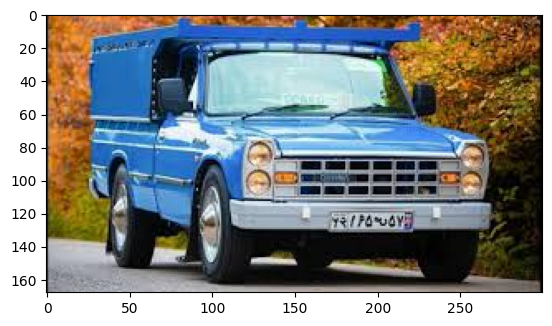

torch.Size([3, 224, 224])

In [39]:
from PIL import Image
from matplotlib import pyplot as plt
class_to_index={
        "nissan":0,
        "paykan":1
    }
inference_image_path="/content/nissan2.jpg"
test_transform=T.Compose([
  T.Resize((224,224)),
  T.ToTensor(), #colorjitter was removed here
  T.Normalize(mean=[0.485, 0.456, 0.406] , std = [0.229, 0.224, 0.225])  # imagenet mean and std for using pretrained models

])
inference_image=Image.open(inference_image_path).convert("RGB")
plt.imshow(inference_image)
plt.show()
inference_image=test_transform(inference_image)
inference_image.shape

In [40]:
inference_image=torch.unsqueeze(inference_image,dim=0)
inference_image.shape

torch.Size([1, 3, 224, 224])

In [41]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [43]:
model=model.to(device)
inference_image=inference_image.to(device)

In [44]:
model.eval()

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
  

In [45]:
with torch.inference_mode():
  output=model(inference_image)
output

SwinImageClassifierOutput(loss=None, logits=tensor([[ 3.1928, -3.1540]]), hidden_states=None, attentions=None, reshaped_hidden_states=None)

In [46]:
output.logits

tensor([[ 3.1928, -3.1540]])

In [47]:
_ , pred=torch.max(output.logits,1)
pred

tensor([0])

In [48]:
pred.item()

0

In [49]:
index_to_class={
    0:"nissan",
    1:"vanet"
}

In [51]:
print(f"predicted class:{index_to_class[pred.item()]}")

predicted class:nissan


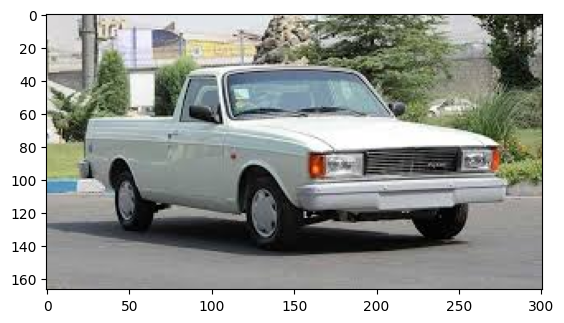

predicted class:vanet


In [52]:
inference_image_path="/content/vanet1.jpg"
inference_image=Image.open(inference_image_path).convert("RGB")
plt.imshow(inference_image)
plt.show()
inference_image=test_transform(inference_image)
inference_image=torch.unsqueeze(inference_image,dim=0)
inference_image=inference_image.to(device)
with torch.inference_mode():
  output=model(inference_image)
_ , pred=torch.max(output.logits,1)
print(f"predicted class:{index_to_class[pred.item()]}")

In [53]:
!git clone https://github.com/mehdi-kooshkestani/transformers.git

Cloning into 'transformers'...


In [54]:
# You can check your current working directory by running
import os
print(os.getcwd())


/content


In [55]:
!ls

checkpoint  dataset.zip   nissan1.jpg  nissan3.jpg  transformers  vanet2.jpg  vanet4.jpg
Data	    IRCarDataset  nissan2.jpg  sample_data  vanet1.jpg	  vanet3.jpg


In [56]:
!find /content -name "*.ipynb"


In [57]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [58]:
!ls /content/drive/MyDrive


 20190928_153232.jpg
 20190928_153239.jpg
 20190928_153241.jpg
 20190928_153310.jpg
 20190928_153325.jpg
 20190928_153351.jpg
 accounting
'Action memo20180111_143339_1.jpg'
'Action memo20190705_102930_1.jpg'
'Colab Notebooks'
 contact
'DL data'
 documents
 ICTESTER__-WWW.UNI-DOC.IR-.rar
 pic.rar
 pics
' projects'
 ticket_15139115_p9g26j_2024-09-05_15_13_07_90ef80c9f0608a38c7e2ec025b5a63b2.pdf
 Video014-1.mp4
 Video014.mp4
 Video017.mp4
 Video023.mp4
'جداسازی منابع همزمان زمین شناسی با کمک بیان.pptx'


In [59]:
!find /content -name "car*.ipynb"


/content/drive/MyDrive/Colab Notebooks/car classification.ipynb


In [60]:
!cp "/content/drive/MyDrive/Colab Notebooks/car classification.ipynb" "/content/transformers/"


In [61]:
!cp -r /content/Data /content/transformers/
!cp -r /content/IRCarDataset /content/transformers/
!cp -r /content/checkpoint /content/transformers/
!cp  /content/dataset.zip /content/transformers/


In [62]:
!cp  /content/*.jpg /content/transformers/

In [63]:
%cd /content/transformers


/content/transformers


In [66]:

!git config --global user.email "mk.auad@gmail.com"
!git config --global user.name "mehdi-kooshkestani"

In [69]:
!git branch

* main


In [71]:
# Add all new files and changes
!git add .

# Commit the changes with a message
!git commit -m "Added notebook, data, and checkpoint files"

# Push the changes to GitHub
!git push origin main


On branch main
Your branch is based on 'origin/main', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean
Enumerating objects: 2153, done.
Counting objects: 100% (2153/2153), done.
Delta compression using up to 2 threads
Compressing objects: 100% (2152/2152), done.
Writing objects: 100% (2153/2153), 171.25 MiB | 8.06 MiB/s, done.
Total 2153 (delta 0), reused 0 (delta 0), pack-reused 0
remote: error: Trace: 8a9efa223d45e99e72952029d506d956f825ae2dc229858af4c3ffe28f79ec5d
remote: error: See https://gh.io/lfs for more information.
remote: error: File checkpoint/ckpnt-1.pth is 105.29 MB; this exceeds GitHub's file size limit of 100.00 MB
remote: error: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/mehdi-kooshkestani/transformers.git
 ! [remote rejected] main -> main (pre-receive hook declined)
error: failed to push some refs to 'https://github.com/mehdi-

In [68]:
!git config --global user.name


mehdi-kooshkestani
